In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_location="C:\\Users\\Greeshma\\OneDrive\\Naresh IT\\files\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# Outliers # 

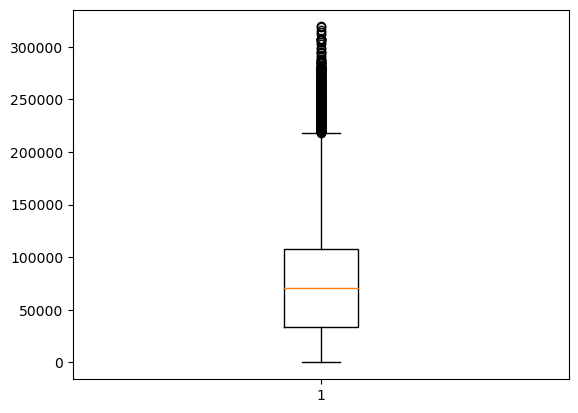

In [3]:
plt.boxplot(visa_df["prevailing_wage"])
plt.show()
# Orange line: 

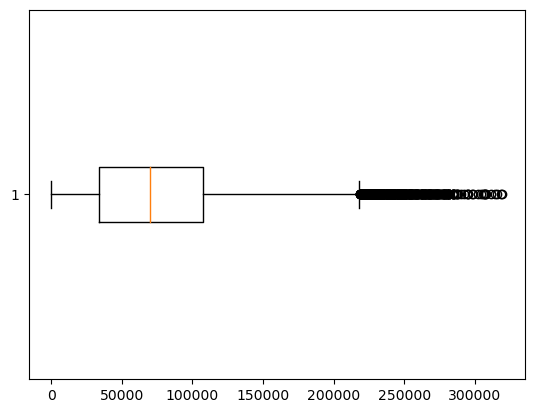

In [5]:
plt.boxplot(visa_df["prevailing_wage"],vert=False)
plt.show()

In [ ]:
.. code-block:: none

          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                      d |-----:-----|
     flier             <----------->            fliers
                            IQR


**Procedure to find the Outliers**

**step-1**:
    - Calculate Q1 Q2 and Q3
    
**step-2**:
    - Calculate IQR
    
**step-3**:
    - Calculate Upper Bound====Q3+1,5*IQR
    
    - Calculate Lower Bound====Q1-1,5*IQR
    
**step-4**:
    - Find the outlier which are having greater than UB
    
    - Find the outlier which are having less than LB

In [16]:
# step-1 
p_wage=visa_df["prevailing_wage"]
wage_25p=np.percentile(p_wage,25)
wage_50p=np.percentile(p_wage,50)
wage_75p=np.percentile(p_wage,75)
wage_25p,wage_50p,wage_75p

(34015.479999999996, 70308.20999999999, 107735.51250000001)

In [17]:
# IQR 
iqr=wage_75p-wage_25p
iqr

73720.03250000002

In [18]:
# UB and LB
a=1.5
lb=wage_25p-a*(iqr)
lb
ub=wage_75p+a*(iqr)
ub
lb,ub

(-76564.56875000002, 218315.56125000003)

In [19]:
# Conditions
con1=p_wage>ub
con1

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476     True
25477    False
25478    False
25479    False
Name: prevailing_wage, Length: 25480, dtype: bool

In [20]:
con2=p_wage<lb
con2

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Name: prevailing_wage, Length: 25480, dtype: bool

In [29]:
visa_df[con1 | con2]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [28]:
len(visa_df[con1 | con2])

427

In [34]:
p_wage=visa_df["prevailing_wage"]
wage_25p=np.percentile(p_wage,25)
wage_50p=np.percentile(p_wage,50)
wage_75p=np.percentile(p_wage,75)
wage_25p,wage_50p,wage_75p
# IQR 
iqr=wage_75p-wage_25p
iqr
lb=wage_25p-1.5*(iqr)
ub=wage_75p+1.5*(iqr)
# Conditions
con1=p_wage>ub
con1
con2=p_wage<lb
con2
outlier_df=visa_df[con1 | con2]
outlier_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [30]:
len(outlier_df)

427

# Outliers in all the numeric columns #

In [30]:
def outliers(col):

    Q1=np.percentile(visa_df[col],25)
    Q2=np.percentile(visa_df[col],50)
    Q3=np.percentile(visa_df[col],75) 
    iqr=Q3-Q1
    iqr
    ub=Q3+1.5*(iqr)
    lb=Q1-1.5*(iqr)
    con1=visa_df[col]>ub
    con2=visa_df[col]<lb
    outlier_df=visa_df[con1 | con2]
    print(f"The {col} has {len(outlier_df)} outliers")
numeric_cols=visa_df.select_dtypes(exclude="object").columns
for col in numeric_cols:
    outliers(col)

The no_of_employees has 1556 outliers
The yr_of_estab has 3260 outliers
The prevailing_wage has 427 outliers


**Non Outliers**

In [3]:
p_wage=visa_df["prevailing_wage"]
wage_25p=np.percentile(p_wage,25)
wage_50p=np.percentile(p_wage,50)
wage_75p=np.percentile(p_wage,75)
wage_25p,wage_50p,wage_75p
# IQR 
iqr=wage_75p-wage_25p
lb=wage_25p-1.5*(iqr)
ub=wage_75p+1.5*(iqr)
# Conditions
# Outliers df
con1=p_wage>ub
con2=p_wage<lb
outlier_df=visa_df[con1 | con2]
# Non outliers df
con11=visa_df["prevailing_wage"]<ub
con22=visa_df["prevailing_wage"]>lb
non_outliers_df=visa_df[con11 & con22]


In [4]:
len(non_outliers_df),len(outlier_df)

(25053, 427)

In [34]:
len(non_outliers_df)+len(outlier_df)

25480

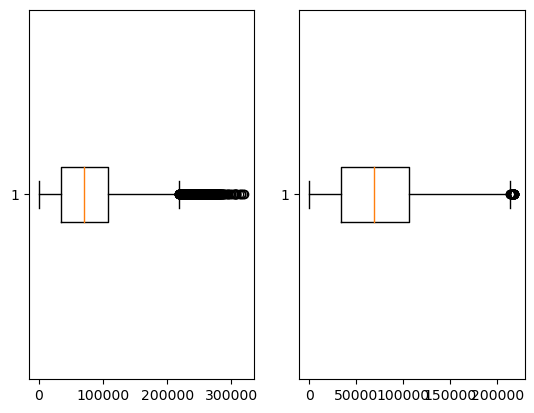

In [45]:
# will compare 
# total data (25480) vs non outlier data (25053)


plt.subplot(1,2,1)
plt.boxplot(visa_df["prevailing_wage"],vert=False)  # 25480

plt.subplot(1,2,2)
plt.boxplot(non_outliers_df["prevailing_wage"],vert=False)
plt.show()

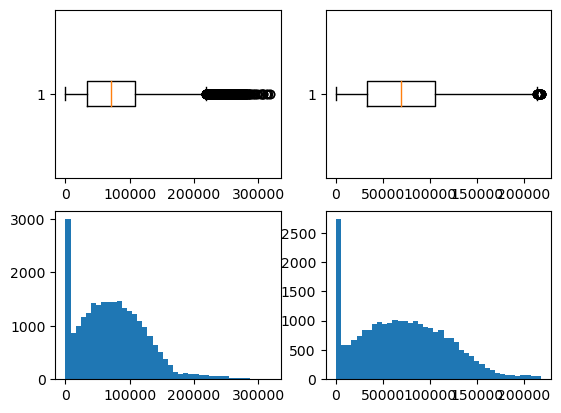

In [46]:
# Comparing along with histograms
plt.subplot(2,2,1)
plt.boxplot(visa_df["prevailing_wage"],vert=False)  # 25480

plt.subplot(2,2,2)
plt.boxplot(non_outliers_df["prevailing_wage"],vert=False)

plt.subplot(2,2,3)
plt.hist(visa_df["prevailing_wage"],bins=40)

plt.subplot(2,2,4)
plt.hist(non_outliers_df["prevailing_wage"],bins=40)
plt.show()

# How to deal Outliers #

- Drop the outliers based on some percentage

   - if you have very huge data
    
   - and the outliers percenatge is < 2, then drop the outliers

   - Drop the outliers means , we are removing some rows all the columns
    
   - In the above example total count is 25480 , outliers are 427 

   - 427*100/25480 = 1.6
    
   - After the removing 427 observations , we have 25053 observations (98% of data)

- Impute (Fill) the outliers with median value

   - we already know that outliers doesnot affect on the median value
    
   - so if we dont want to loss the data , and you want to fill with median value

- Impute (fill) with UB and LB values (Capping)

   - Fill the Outliers with UB value , which are having greater than UB
    
   - Fill the Outliers with LB value , which are having less than LB